In [1]:
#subject6
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=2697f0ca006287be25528d7745019757f8c7287f8dade4c4f3eb3ade41ab397b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import os
import pandas as pd
from sklearn import tree 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
ram_prices.head(10)

,Unnamed: 0,date,price
0,0,1957.00,411041792.0
1,1,1959.00,67947725.0
2,2,1960.00,5242880.0
3,3,1965.00,2642412.0
4,4,1970.00,734003.0
5,5,1973.00,399360.0
6,6,1974.00,314573.0
7,7,1975.00,421888.0
8,8,1975.08,180224.0
9,9,1975.25,67584.0


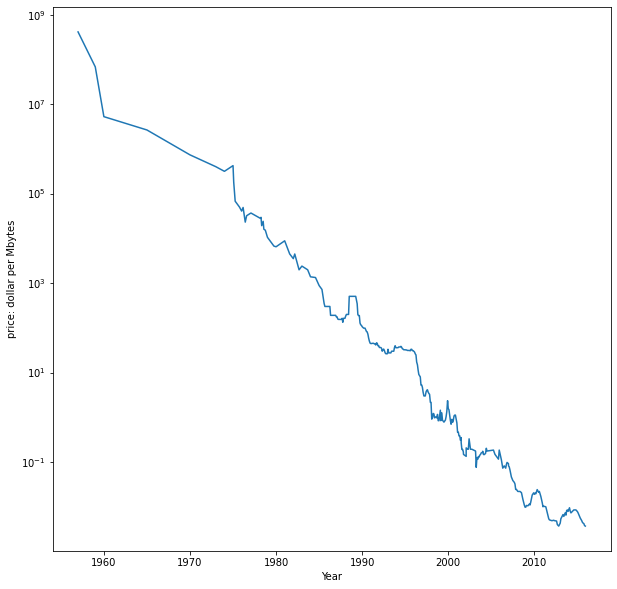

In [4]:
plt.figure(figsize=(10, 10))
#plt.plot(ram_prices.date, ram_prices.price)
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("price: dollar per Mbytes")
plt.show()

In [5]:
train = ram_prices[ram_prices.date < 2000]
test = ram_prices[ram_prices.date >= 2000]

In [6]:
X = ram_prices.date[:, np.newaxis]
X_train = train.date[:, np.newaxis]
Y_train = np.log(train.price)
X_test = test.date[:, np.newaxis]
Y_test = np.log(test.price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [8]:
decision_tree_regressor = tree.DecisionTreeRegressor()
linear_regression = LinearRegression()
decision_tree_regressor.fit(X_train, Y_train)
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [9]:
predict_tree = decision_tree_regressor.predict(X)
predict_linear = linear_regression.predict(X) #ram_prices.dateのデータ＝説明変数、Xをpredict methodに渡すと予測されたYの値が返ってくるよ。
print(f"R2: {decision_tree_regressor.score(X_train, Y_train)}")
print(f"R2: {decision_tree_regressor.score(X_test, Y_test)}")
print(f"R2: {linear_regression.score(X_train, Y_train)}")
print(f"R2: {linear_regression.score(X_test, Y_test)}")

accuracy: 1.0
accuracy: -5.229712351825342
accuracy: 0.9592820391429788
accuracy: 0.8303173629506829


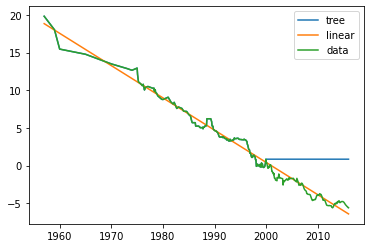

In [10]:
plt.plot(ram_prices.date, predict_tree, label="tree")
plt.plot(ram_prices.date, predict_linear, label="linear")
plt.plot(ram_prices.date, np.log(ram_prices.price), label="data")
plt.legend()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ram_prices.date[:, np.newaxis], np.log(ram_prices.price), random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
decision_tree_regressor_regular = tree.DecisionTreeRegressor()
decision_tree_regressor_regular.fit(X_train, Y_train)
print(f"accuracy: {decision_tree_regressor_regular.score(X_train, Y_train)}")
print(f"accuracy: {decision_tree_regressor_regular.score(X_test, Y_test)}")

accuracy: 0.9999829704971058
accuracy: 0.9935118637866908
